## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [4]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [5]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
len(train)

2

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    #x  = scaler.fit_transform(x)
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x),-1))
    return x
    

def preproc_y(y,num_classes = 10):
    if y.shape[-1] ==1:
        y= keras.utils.to_categorical(y,num_classes)
        return y
    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [26]:
x_train.shape[1:]

(3072,)

In [29]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units = 10,num_neurous=[512,512,256,256,128,128,64,64]):
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurous):
        if i ==0:
            x = keras.layers.Dense(units = n_units,activation = "relu",name ="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units,activation = "relu",name = "hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units = output_units,activation = "softmax",name = "output")(x)
    model = keras.models.Model(inputs = [input_layer],outputs = [out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512     
__________

In [30]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [31]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [32]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7457 - acc: 0.3760 - val_loss: 1.5528 - val_acc: 0.4498
Epoch 2/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.4983 - acc: 0.4690 - val_loss: 1.4623 - val_acc: 0.4853
Epoch 3/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.3707 - acc: 0.5165 - val_loss: 1.4106 - val_acc: 0.5074
Epoch 4/100
50000/50000 [==============================] - 10s 200us/step - loss: 1.2738 - acc: 0.5502 - val_loss: 1.3754 - val_acc: 0.5201
Epoch 5/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.1806 - acc: 0.5852 - val_loss: 1.3733 - val_acc: 0.5272
Epoch 6/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.1019 - acc: 0.6109 - val_loss: 1.4036 - val_acc: 0.5085
Epoch 7/100
50000/50000 [==============================] - 8s 160us

50000/50000 [==============================] - 9s 175us/step - loss: 0.0731 - acc: 0.9766 - val_loss: 3.2859 - val_acc: 0.5421
Epoch 58/100
50000/50000 [==============================] - 9s 187us/step - loss: 0.0818 - acc: 0.9739 - val_loss: 3.0716 - val_acc: 0.5380
Epoch 59/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.0800 - acc: 0.9738 - val_loss: 3.0328 - val_acc: 0.5322
Epoch 60/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.0703 - acc: 0.9771 - val_loss: 3.0955 - val_acc: 0.5343
Epoch 61/100
50000/50000 [==============================] - 10s 192us/step - loss: 0.0807 - acc: 0.9738 - val_loss: 3.2196 - val_acc: 0.5453
Epoch 62/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.0706 - acc: 0.9772 - val_loss: 3.0027 - val_acc: 0.5381
Epoch 63/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.0712 - acc: 0.9782 - val_loss: 3.2187 - val_acc: 0.5406
Epoch 64/100
50000/50000 [======

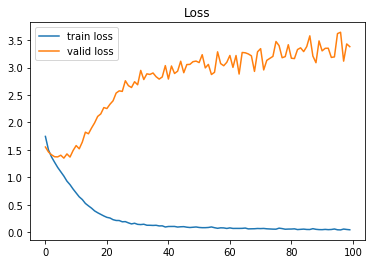

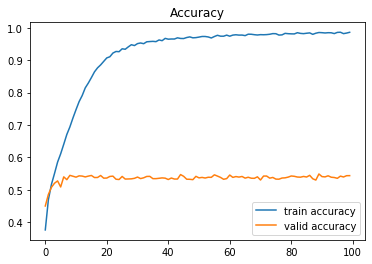

In [34]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()